**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [ ]:
data=pd.read_csv("titanic_data.csv")

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Numerical Value Analysis**

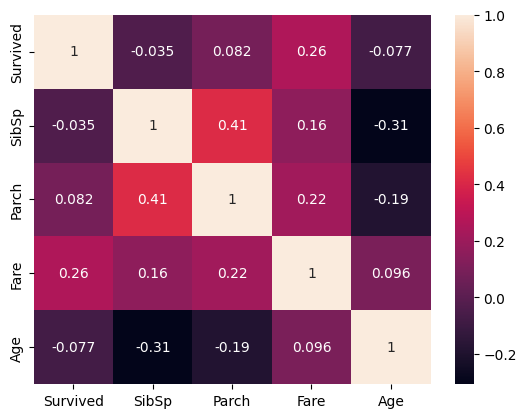

In [ ]:
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot=True)

sibsp- Number of siblings/spouses aboard the Titanic

In [ ]:
data["SibSp"].nunique()

7

In [ ]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

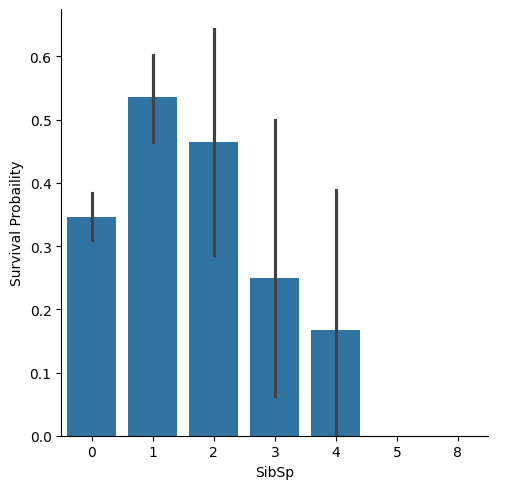

In [ ]:
sns.catplot(x="SibSp",y="Survived",data=data,kind="bar").set_ylabels("Survival Probaility")

Age

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


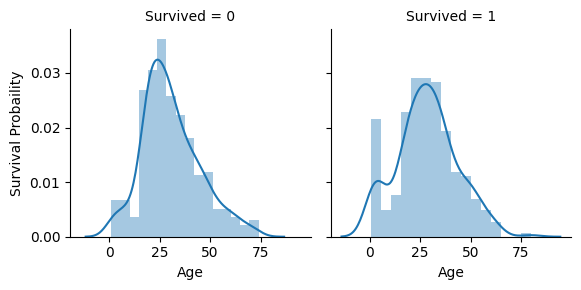

In [ ]:
age_visual=sns.FacetGrid(data,col="Survived")
age_visual=age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probaility")

Sex

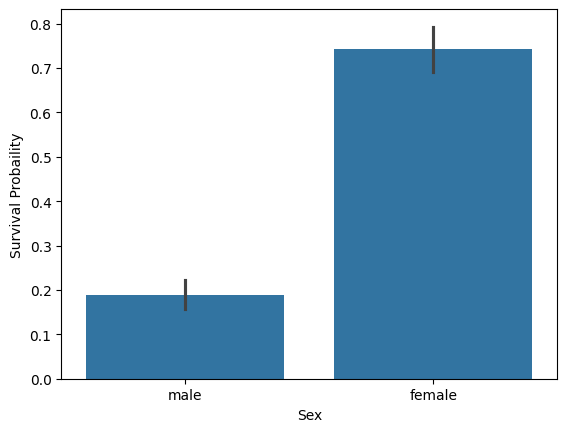

In [ ]:
sex_plot=sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("Survival Probaility")

In [ ]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


PClass

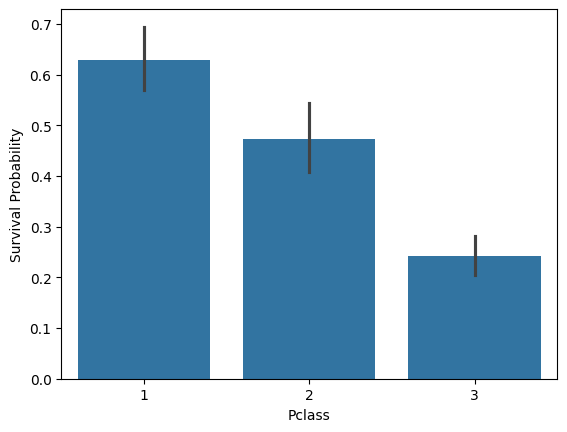

In [ ]:
pclass=sns.barplot(x="Pclass",y="Survived",data=data).set_ylabel("Survival Probability")

Embarked

In [ ]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data["Embarked"]=data["Embarked"].fillna("S")

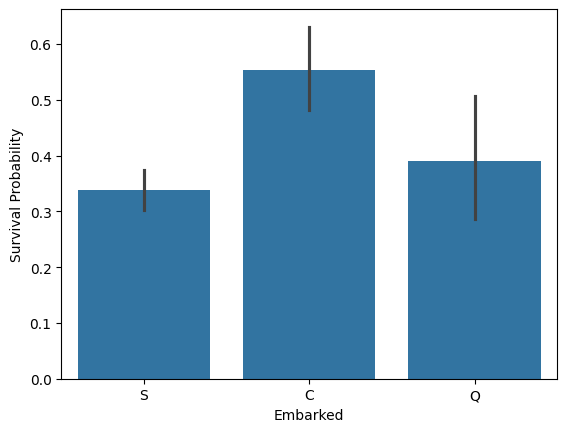

In [ ]:
q=sns.barplot(x="Embarked",y="Survived",data=data).set_ylabel("Survival Probability")

**Preparing Data**

In [ ]:
data=pd.read_csv("titanic_data.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
mean=data["Age"].mean()

In [ ]:
std=data["Age"].std()
is_null=data["Age"].isnull().sum()

In [ ]:
print(mean,std,is_null)

29.69911764705882 14.526497332334042 177


In [ ]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)

In [ ]:
rand_age

array([42, 32, 31, 40, 32, 30, 32, 17, 27, 35, 22, 39, 19, 37, 17, 30, 42,
       41, 40, 18, 26, 40, 16, 18, 24, 39, 20, 17, 31, 41, 27, 33, 19, 40,
       18, 23, 36, 22, 29, 15, 30, 41, 30, 36, 15, 41, 29, 26, 31, 20, 16,
       42, 33, 39, 23, 38, 21, 36, 20, 34, 25, 36, 33, 37, 20, 30, 34, 16,
       41, 33, 19, 35, 33, 36, 31, 16, 38, 32, 41, 41, 22, 39, 38, 15, 42,
       40, 34, 21, 25, 27, 21, 33, 22, 22, 40, 18, 41, 34, 26, 17, 33, 27,
       41, 33, 34, 33, 31, 24, 35, 39, 22, 22, 42, 30, 36, 30, 23, 27, 28,
       22, 31, 26, 41, 29, 33, 22, 22, 20, 22, 26, 35, 32, 43, 23, 31, 16,
       41, 17, 42, 35, 28, 15, 26, 27, 35, 29, 18, 22, 29, 23, 26, 39, 29,
       25, 21, 20, 32, 33, 21, 15, 38, 43, 26, 21, 28, 33, 20, 39, 41, 31,
       23, 26, 31, 32, 42, 35, 22])

In [ ]:
a=data["Age"].copy()

In [ ]:
a[np.isnan(a)]=rand_age

In [ ]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data["Age"]=a

In [ ]:
data["Age"].isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data["Embarked"]=data["Embarked"].fillna("S")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
col_to_drop=["PassengerId","Cabin","Ticket","Name"]
data.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
genders={'male':0, 'female':1}
data['Sex']=data["Sex"].map(genders)

In [ ]:
ports={'S':0,'C':1,'Q':2}
data["Embarked"]=data["Embarked"].map(ports)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


**Splitting the Data**

In [ ]:
x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=0)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

**Classification**

In [ ]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [ ]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
logreg_ypred=logreg.predict(x_test)
svc_classifier_ypred=svc_classifier.predict(x_test)
dt_classifier_ypred=dt_classifier.predict(x_test)
knn_classifier_ypred=knn_classifier.predict(x_test)
rf_classifier_ypred=rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

logreg_acc=accuracy_score(y_test,logreg_ypred)
svc_classifier_acc=accuracy_score(y_test,svc_classifier_ypred)
dt_classifier_acc=accuracy_score(y_test,dt_classifier_ypred)
knn_classifier_acc=accuracy_score(y_test,knn_classifier_ypred)
rf_classifier_acc=accuracy_score(y_test,rf_classifier_ypred)

In [ ]:
print("Logistic Regression : ",round(logreg_acc*100,2))
print("Support Vector      : ",round(svc_classifier_acc*100,2))
print("Decision Tree       : ",round(dt_classifier_acc*100,2))
print("KNN Classifier      : ",round(knn_classifier_acc*100,2))
print("Random Forest       : ",round(rf_classifier_acc*100,2))

Logistic Regression :  80.22
Support Vector      :  81.72
Decision Tree       :  80.6
KNN Classifier      :  81.72
Random Forest       :  80.22
